In [1]:
import jax
# Enable Float64 for more stable matrix inversions.
jax.config.update("jax_enable_x64", True)

from dataclasses import dataclass
import warnings
from typing import List, Union

import cola

import jax.numpy as jnp
import jax.random as jr
from jaxtyping import (
    Array,
    Float,
    install_import_hook,
    Num,
)
import tensorflow_probability.substrates.jax.bijectors as tfb

with install_import_hook("gpjax", "beartype.beartype"):
    import gpjax as gpx
from gpjax.typing import (
    Array,
    ScalarInt,
    ScalarFloat,
)
from gpjax.distributions import GaussianDistribution

import matplotlib.pyplot as plt


In [2]:
# prepare some plotting utilities
x1_plot, x2_plot = jnp.meshgrid(jnp.linspace(-1.5,1.5,50), jnp.linspace(-1.5,1.5,50))
xplot2d = jnp.stack([x1_plot.reshape(-1), x2_plot.reshape(-1)]).T # [2500, 2]
xplot1d = jnp.stack([jnp.linspace(-1.5,1.5,50), jnp.linspace(-1.5,1.5,50)]).T # [50, 2]
def contour_plot(Z, ax):
    Z = Z.reshape(50, 50)
    cp = ax.contourf(x1_plot, x2_plot, Z)
    ax.scatter(X[:,0], X[:,1], c="red", marker="x", label="data")
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)

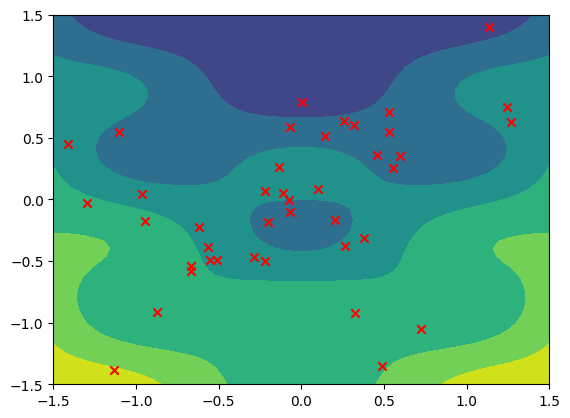

In [3]:
# ground truth function
def f(x): 
    return (x[:,0:1]**2 - 2*x[:,1:2] + jnp.cos(3*x[:,0:1])*jnp.sin(5*x[:,1:2]))

# simulate a noisy dataset of 50 noisy observations
n, noise = 50, 0.01
X = jr.normal(jr.PRNGKey(12345), shape=(n,2)) 
y = f(X) + jr.normal(jr.PRNGKey(12345), shape= (n, 1)) * noise
D = gpx.Dataset(X=X, y=y)

# plot the ground truth function
fig, ax = plt.subplots()
contour_plot(f(xplot2d), ax)

In [11]:
@dataclass
class EponentiationKernel(gpx.kernels.AbstractKernel):
    base_kernel: gpx.kernels.RBF = None
    def __call__(self,x: Float[Array, " D"],y: Float[Array, " D"]) -> ScalarFloat:
        return jnp.exp(self.base_kernel.variance)*(jnp.exp(self.base_kernel(x, y)) - 1.0)











